Problema de negócio:
Usando dados históricos é possível prever o salário de alguém com base no tempo dedicado aos estudos em horas por mês?

# Machine Learning com Scikit-Learn

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Carregando os Dados

In [2]:
# Carrega o dataset 
df = pd.read_csv('dataset.csv')

In [4]:
df.shape

(500, 2)

In [5]:
df.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [6]:
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Análise exploratória

In [3]:
# Correlação 
df.corr()    

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [4]:
# Resumo estatístico do dataset 
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [5]:
# Resumo estatístico da variável preditores
df["horas_estudo_mes"].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

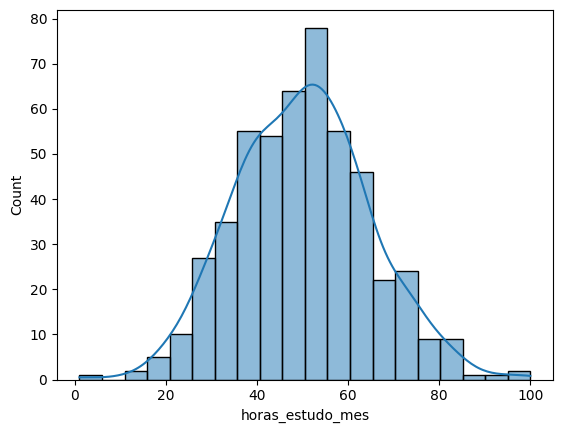

In [7]:
# Histograma da variável preditora 
sns.histplot(data=df, x="horas_estudo_mes", kde=True)